# Look at point distribution by team

In this notebook, the total points obtained byeach team will be investigated. This requires that players have played >60 minutes to be considered.

Start by importing packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in data table

In [2]:
data = pd.read_csv('../../data/csv/data01.csv')
data.head()

,element_name,element,element_type,fixture,kickoff_time,was_home,team,opponent_team,minutes,total_points
0,Cech,0,0,0,2018-08-12T15:00:00Z,True,0,12,90,3
1,Cech,0,0,13,2018-08-18T16:30:00Z,False,0,5,90,3
2,Cech,0,0,20,2018-08-25T14:00:00Z,True,0,18,90,3
3,Cech,0,0,32,2018-09-02T12:30:00Z,False,0,4,90,1
4,Cech,0,0,45,2018-09-15T14:00:00Z,False,0,14,90,2


Read teams data table

In [3]:
teams = pd.read_csv('../../data/csv/teams.csv')

There are 20 teams in the permier league. We should loop through all of these, isolate selections which have played for that team and have played >60 minutes, and sum the column.

In [30]:
# Minimum minutes
minimum_minutes = 60

# Team points
team_points = np.zeros(20, dtype='int')

# Average/std player points
mean_team_points = np.zeros(20, dtype='float')
std_team_points = np.zeros(20, dtype='float')

for i in range(20):
    team_data = data.loc[data['team']==i,:]
    team_data = team_data.loc[team_data['minutes']>=minimum_minutes,:]
    team_points[i] = np.sum(team_data['total_points'])
    mean_team_points[i] = np.mean(team_data['total_points'])
    std_team_points[i] = np.std(team_data['total_points'])

Text(0.5, 1.0, 'Total Points by Team')

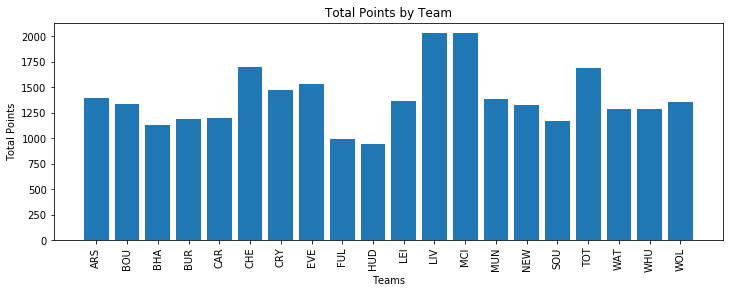

In [33]:
plt.figure(figsize=(12,4));
plt.bar(range(20), team_points)
plt.xticks(range(20), labels=teams['short_name'], rotation=90)
plt.ylabel('Total Points')
plt.xlabel('Teams')
plt.title('Total Points by Team')

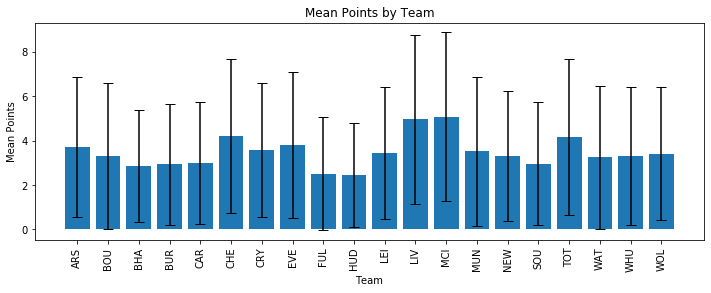

In [43]:
plt.figure(figsize=(12,4));
plt.bar(range(20), mean_team_points);
plt.errorbar(range(20), mean_team_points, std_team_points, capsize=5, ls='', color=(0,0,0))
plt.xticks(range(20), labels=teams['short_name'], rotation=90);
plt.ylabel('Mean Points');
plt.xlabel('Team');
plt.title('Mean Points by Team');

#### Points by position

ValueError: shape mismatch: objects cannot be broadcast to a single shape

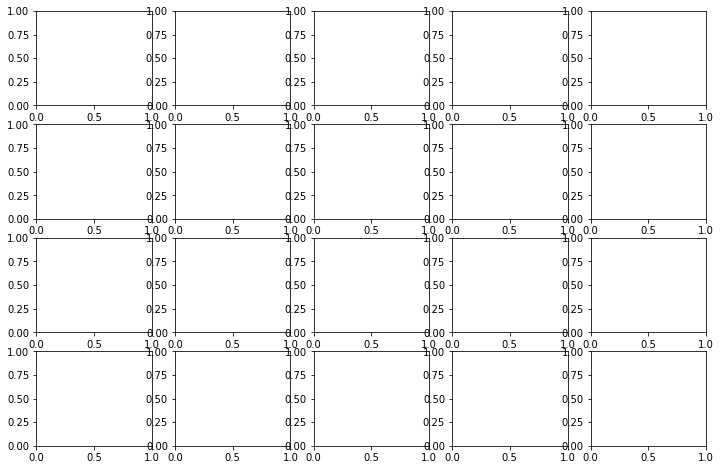

In [59]:
# mean/std points (row=position, column=team)
mean_points = np.zeros((4,20), dtype='float')
std_points = np.zeros((4,20), dtype='float')

# subplot
fig,ax = plt.subplots(4,5, figsize=(12,8));

for i in range(20):
    for j in range(4):
        team_data = data.loc[data['team']==i,:]
        team_position_data = team_data.loc[team_data['element_type']==j]
        mean_points[j,i] = np.mean(team_position_data['total_points'])
        std_points[j,i] = np.std(team_position_data['total_points'])
    [x,y] = np.unravel_index(i, (4,5))
    ax[x,y].errorbar(range(3), mean_points[:,i], std_points[:,i])